In [85]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'

from scipy.stats import pearsonr

In [81]:
pvalues_directory = os.path.join(GTEx_directory, 'data','retrained_inception_pvalues.hdf5')
features_directory = os.path.join(GTEx_directory, 'data','retrained_inceptionet_aggregations.hdf5')
with h5py.File(pvalues_directory,'r') as f, h5py.File(features_directory,'r') as g:
    pvalue_group = f['128']['1']['mean']
    real_pvalues = pvalue_group['real']['pvalues'].value
    shuffled_pvalues = pvalue_group['5']['pvalues'].value
    print (min(real_pvalues))
    print (min(shuffled_pvalues))
    shuffled_idx = pvalue_group['1']['shuffled_idx'].value
    feature_matrix = g['lung']['128']['mean'].value
    expression_matrix = g['lung']['128']['expression'].value
    transcript_IDs = g['lung']['128']['expression_IDs'].value


1.26247814785e-05
2.25538069443e-05


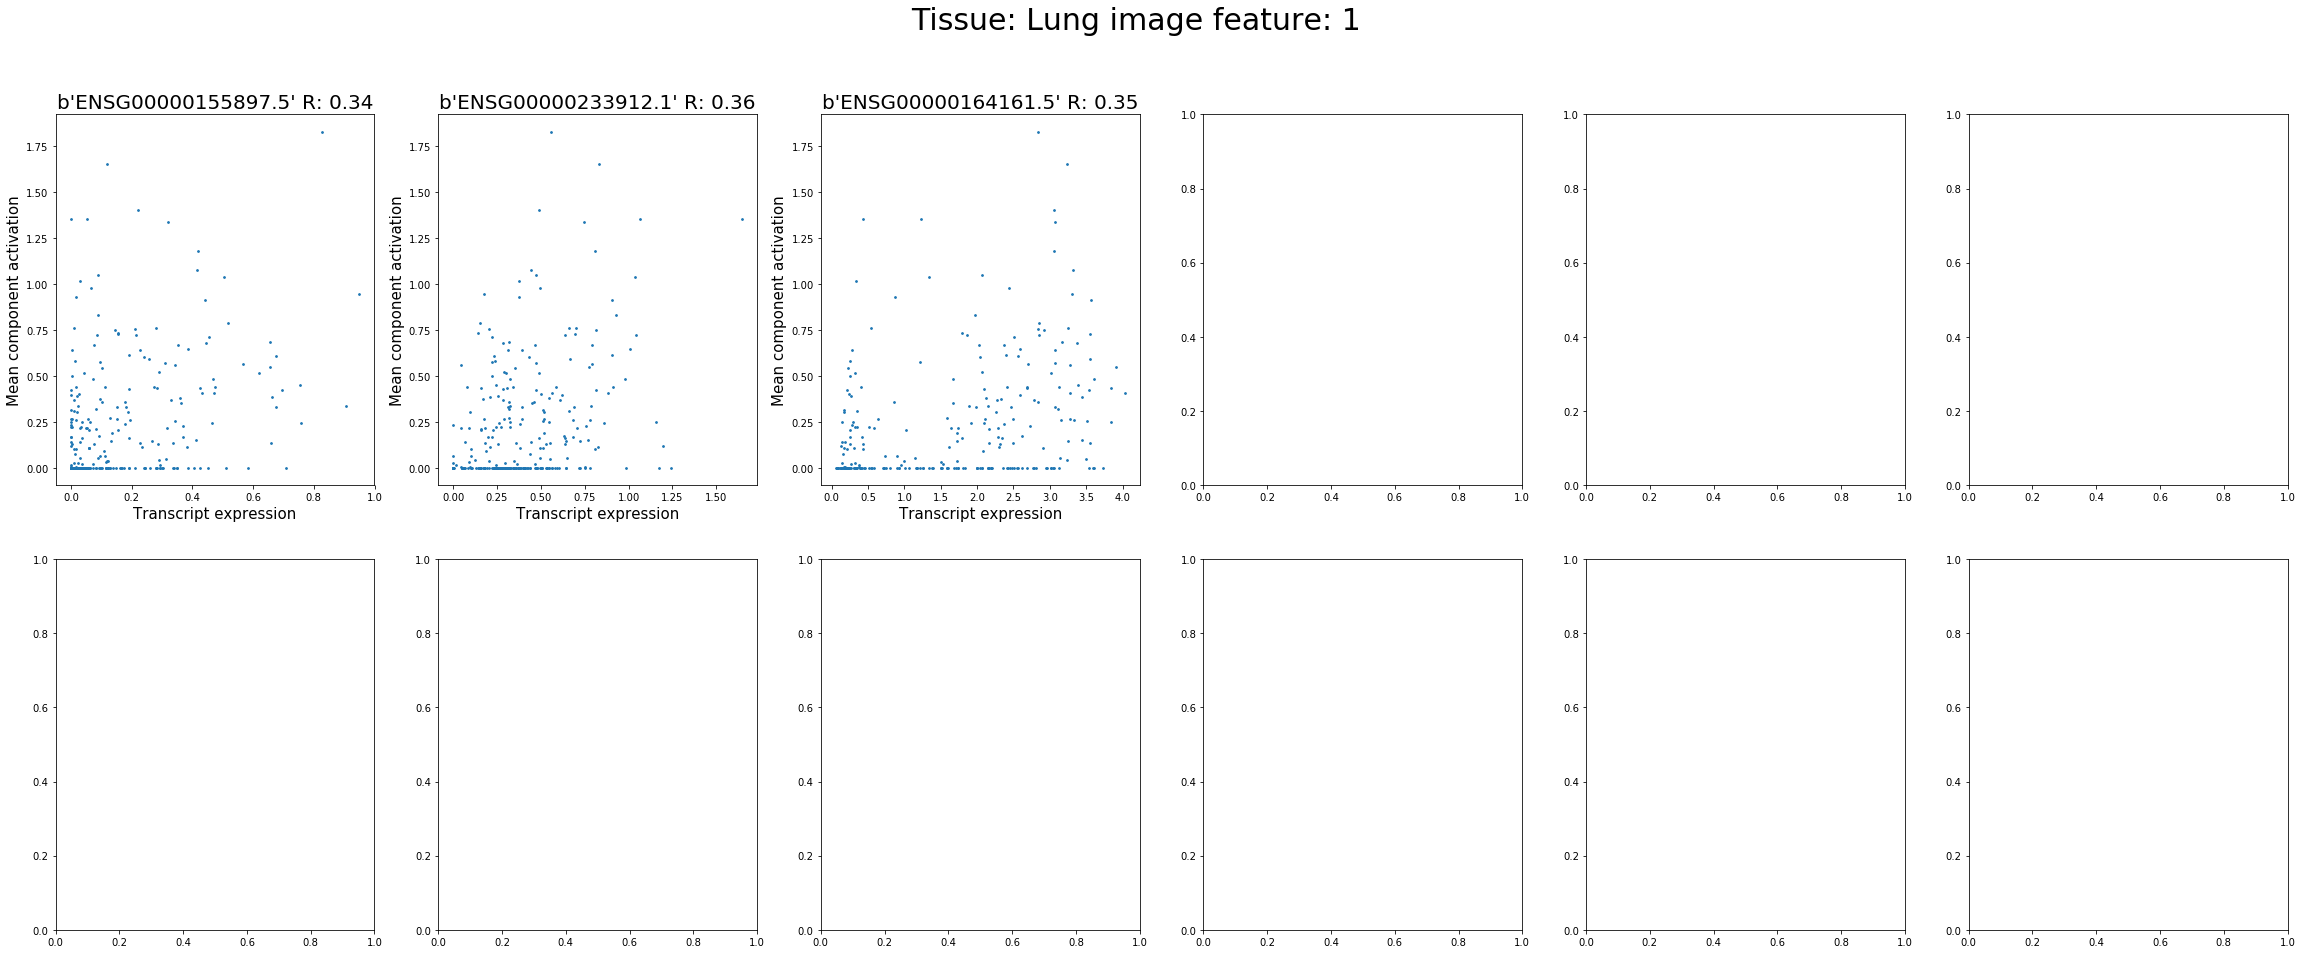

NameError: name 'shuffled_y_pheno' is not defined

In [96]:
sorted_real_pvalues_idx = np.argsort(real_pvalues)
sorted_shuffled_pvalues_idx = np.argsort(shuffled_pvalues)
tissue = 'Lung'
feature = 1
feature_vector = feature_matrix[:,feature]
shuffled_feature_vector = feature_vector[shuffled_idx]


f,a = plt.subplots(2,6, figsize=(40,15))
f.suptitle("Tissue: {} image feature: {}".format(tissue, feature), size=30)
titles = []
for i in range(3):
    real_corr = pearsonr(expression_matrix[:,sorted_real_pvalues_idx[i]], feature_vector)[0]
    a[0][i].scatter(expression_matrix[:,sorted_real_pvalues_idx[i]], feature_vector, s=3)
    a[0][i].set_ylabel("Mean component activation", size=15)
    a[0][i].set_xlabel("Transcript expression", size=15)
    a[0][i].set_title("{} R: {:1.2f}".format(transcript_IDs[sorted_real_pvalues_idx[i]], real_corr),size=20)
plt.show()
    
for i in range(3):
    shuffled_corr = pearsonr(expression_matrix[:,sorted_shuffled_pvalues_idx[i]], shuffled_feature_vector)[0]
    a[1][i].scatter(expression_matrix[:,sorted_shuffled_pvalues_idx[i]], shuffled_y_pheno[:,component], s=3)
    a[1][i].set_ylabel("Mean component activation", size=15)
    a[1][i].set_xlabel("Transcript expression", size=15)
    a[1][i].set_title("{} R: {:1.2f}".format(expression_table[1:,0][sorted_shuffled_pvalues_idx[i]], shuffled_corr), size=20)

sorted_real_indexes = np.argsort(real_pvalues)
sorted_real_pvalues = real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(shuffled_pvalues)
sorted_shuffled_pvalues = shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

a[0][3].plot(sample_real)
# a[3].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[0][3].set_title('Real pvalues', size=20)
a[1][3].plot(sample_shuffle)
# a[4].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[1][3].set_title('Shuffled pvalues', size=20)

a[0][4].scatter([-math.log(x,10) for x in expected_real], [-math.log(x,10) for x in sample_real], s=3)
a[0][4].plot(np.linspace(0,8,100), np.linspace(0,8,100), c='red')
a[0][4].set_title('Real -log10 pvalues', size=20)
a[1][4].scatter([-math.log(x, 10) for x in expected_shuffle], [-math.log(x,10) for x in sample_shuffle], s=3)
a[1][4].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[1][4].set_title('Shuffled -log10 pvalues', size=20)

a[0][5].hist(sample_real,bins=50)
a[0][5].set_title('Real pvalues histogram', size=20)
a[1][5].hist(sample_shuffle,bins=50)
a[1][5].set_title('Shuffled pvalues histogram', size=20)


# os.makedirs(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs'.format(tissue),exist_ok=True)
# # plt.savefig('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs/component{}_sh1_fl0.png'.format(tissue,component))
# print ()
# plt.show()